# 第 1 讲：数值计算方法导学

## 数值法和解析法<span style="font-size:smaller;color:#999;">暨《Python Quickstart》</span>

In [1]:
# 导入数学运算标准库
import math

# 导入向量运算库
import numpy as np

# 导入画图基础库
import matplotlib.pyplot as plt

In [2]:
# 变量赋值

# 假设伞兵体重
m = 68.1 # kg

# 假设空气阻力
c = 12.5 # kg/s

In [3]:
# 定义函数

# 解析解表达式
def vt(t, c, m, g=9.81):
    k = m / c
    return g * k * (1 - math.exp(- t / k))

In [4]:
# 声明向量

size = 2
xs = np.arange(15, step=size) # 其中step是步长

In [5]:
# 打印向量

print(xs)

[ 0  2  4  6  8 10 12 14]


In [6]:
# 初始化存放解析解结果的列表
ys = []

# 依次调用解析解
for x in xs:
    ys.append(vt(x, c, m))

# 打印结果
print(ys)

[0.0, 16.421720579200073, 27.797627475567978, 35.678120697377175, 41.13721718829596, 44.91892648723752, 47.538650327160724, 49.35342572499016]


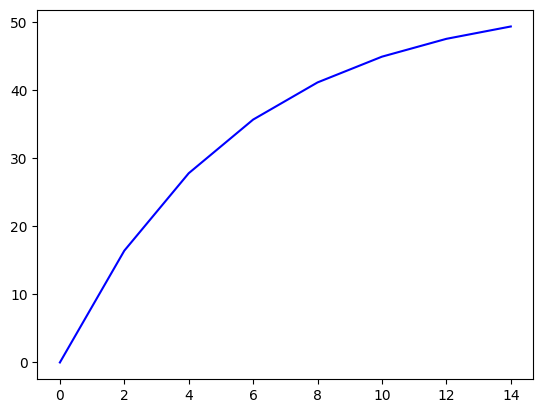

In [7]:
# 初始化
f = plt.figure()
# 画图
plt.plot(xs, ys, 'b-')
f.savefig('analytical.pdf', bbox_inches='tight')

In [8]:
# 数值解迭代式
def yi(c, m, s, g=9.81):
    global ti, vi # 声明全局变量
    k = m / c
    vin = vi + (g - vi / k) * s
    ti += s
    return vin

In [9]:
# 初始化
ti = 0
vi = 0
yis = [0]

# 依次调用迭代式
for i in range(len(xs)):
    vi = yi(c, m, size)
    yis.append(vi)

# 打印结果
print(yis)

[0, 19.62, 32.037356828193836, 39.89621261813736, 44.87002590075947, 48.01791653924718, 50.01019387432531, 51.2710918646611, 52.069105130204015]


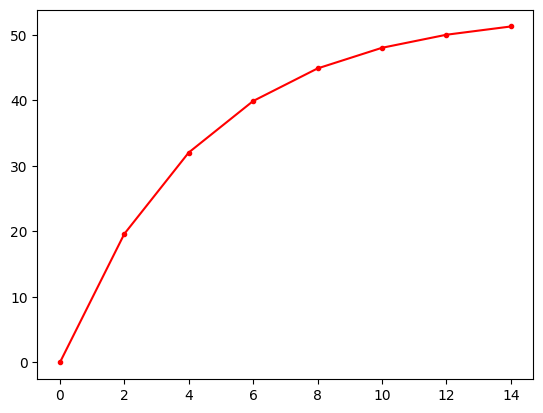

In [10]:
# 初始化
f = plt.figure()
# 画图
plt.plot(xs, yis[:len(xs)], 'r.-')
f.savefig('numerical.pdf', bbox_inches='tight')

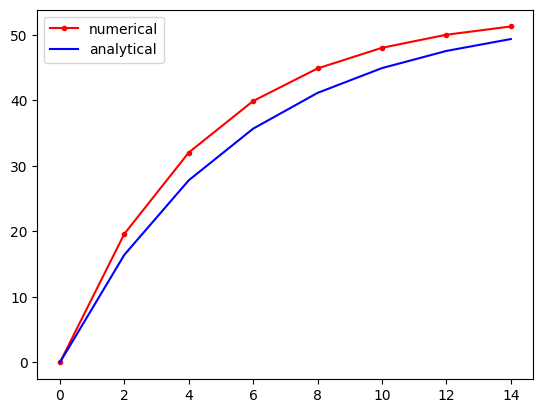

In [11]:
# 初始化
f = plt.figure()
# 比较结果
plt.plot(xs, yis[:len(xs)], 'r.-', label='numerical')
plt.plot(xs, ys, 'b-', label='analytical')
plt.legend()
f.savefig('comparison.pdf', bbox_inches='tight')

## 关于$\pi$的近似值及其有效数字

In [12]:
# 导入数学运算标准库中的常数pi
from math import pi

In [13]:
# 随手打印看看
print(pi)

3.141592653589793


In [14]:
# 导入十进制定点小数库
# 它提供了与学校算术完全一致的精准操作
import decimal

In [15]:
decimal.Decimal.from_float(pi)

Decimal('3.141592653589793115997963468544185161590576171875')

In [16]:
# 上面是虚假的pi
# ====分割线====
# 上面是真实的pi

# 打开记录文件
f = open('pi1000000.txt', 'r')
# print(f.read())

In [17]:
# 倒带到索引位置0
f.seek(0)
# 读取文件前50个字符
pi_text = f.read(50)

# 打印
print(pi_text)

# 比较结果表明：无法从不精确的数值得到比它的精度更高的数值
# 还是要乖乖地指定精度才能做数值计算

3.141592653589793238462643383279502884197169399375


In [18]:
def r_pi(n: int, pi: str) -> float:
    '''
        这是一个函数，它计算𝜋的不同近似值的相对误差.
        n: 有效数字位数
        pi: 作为参考的𝜋的精确表示
    '''
    
    if n > 1:
        n += 1 # 修正小数点位置的bug
    
    p = decimal.Decimal(pi)
    pa = decimal.Decimal(pi[:n])
    
    print(p, pa)
    return (p - pa)/p

In [19]:
# 测试用有效数字
digits = 1

# 检测有效数字是否超过精确值的表示能力
if digits < len(pi_text):
    r = r_pi(digits, pi_text)
else:
    r = float('nan')

# 用格式化字符串的方式打印结果
print(f'{r:e}')

3.141592653589793238462643383279502884197169399375 3
4.507034144862798538669741977e-2
